In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

In [44]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB_AI SEM 5/pertemuan-2-tingkat-stress-mahasiswa/student_sleep_patterns.csv')

percentage = 0.3
data[:int(len(data)* percentage)]

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,24,Male,4th Year,5.1,4.8,2.6,2,8,6,6.30,4.84,7.27,9.39
146,147,20,Female,3rd Year,4.2,3.9,1.9,4,118,8,4.98,7.38,5.24,8.94
147,148,20,Other,2nd Year,5.3,8.0,3.8,4,4,4,13.31,3.06,7.53,7.11
148,149,18,Female,2nd Year,7.0,9.7,1.8,5,55,8,17.71,6.37,8.08,8.52


In [46]:
try:
    # Menggunakan file CSV yang ada di folder yang sama
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB_AI SEM 5/pertemuan-2-tingkat-stress-mahasiswa/student_sleep_patterns.csv')
    print("Dataset 'student_sleep_patterns.csv' berhasil dimuat.")
except FileNotFoundError:
    print("ERROR: File 'student_sleep_patterns.csv' tidak ditemukan. Pastikan file berada di folder yang sama.")
    exit()

# Menentukan rentang nilai untuk setiap variabel
universe_sleep_quality = np.arange(1, 11, 1)
universe_study_hours = np.arange(0, 13, 1)
universe_sleep_duration = np.arange(min(df['Sleep_Duration']), max(df['Sleep_Duration'])+1, 0.5)
universe_stress = np.arange(0, 11, 1)

# Membuat variabel fuzzy
sleep_quality = ctrl.Antecedent(universe_sleep_quality, 'Sleep_Quality')
study_hours = ctrl.Antecedent(universe_study_hours, 'Study_Hours')
sleep_duration = ctrl.Antecedent(universe_sleep_duration, 'Sleep_Duration')
stress_level = ctrl.Consequent(universe_stress, 'Stress_Level')


Dataset 'student_sleep_patterns.csv' berhasil dimuat.


In [47]:

sleep_quality['Buruk'] = fuzz.trapmf(sleep_quality.universe, [1, 1, 3, 5])
sleep_quality['Sedang'] = fuzz.trimf(sleep_quality.universe, [3, 6, 8])
sleep_quality['Baik'] = fuzz.trapmf(sleep_quality.universe, [6, 8, 10, 10])

study_hours['Rendah'] = fuzz.trapmf(study_hours.universe, [0, 0, 2, 4])
study_hours['Normal'] = fuzz.trimf(study_hours.universe, [2, 5, 8])
study_hours['Tinggi'] = fuzz.trapmf(study_hours.universe, [6, 9, 12, 12])

sleep_duration['Pendek'] = fuzz.trapmf(sleep_duration.universe, [4, 4, 5, 6.5])
sleep_duration['Cukup'] = fuzz.trimf(sleep_duration.universe, [5.5, 7, 8.5])
sleep_duration['Panjang'] = fuzz.trapmf(sleep_duration.universe, [7.5, 9, 10, 10])

stress_level['Rendah'] = fuzz.trapmf(stress_level.universe, [0, 0, 2, 4])
stress_level['Sedang'] = fuzz.trimf(stress_level.universe, [2, 5, 8])
stress_level['Tinggi'] = fuzz.trapmf(stress_level.universe, [6, 8, 10, 10])

In [48]:
rule1 = ctrl.Rule(sleep_quality['Buruk'] | sleep_duration['Pendek'], stress_level['Tinggi'])
rule2 = ctrl.Rule(study_hours['Tinggi'] & sleep_quality['Buruk'], stress_level['Tinggi'])
rule3 = ctrl.Rule(sleep_quality['Baik'] & study_hours['Normal'] & sleep_duration['Cukup'], stress_level['Rendah'])
rule4 = ctrl.Rule(sleep_quality['Sedang'], stress_level['Sedang'])
rule5 = ctrl.Rule(study_hours['Rendah'] & sleep_duration['Panjang'], stress_level['Rendah'])
rule6 = ctrl.Rule(study_hours['Tinggi'] | sleep_duration['Pendek'], stress_level['Sedang'])
rule7 = ctrl.Rule(sleep_quality['Baik'] & sleep_duration['Panjang'], stress_level['Rendah'])

rule8 = ctrl.Rule(sleep_quality['Baik'] & study_hours['Rendah'], stress_level['Rendah'])

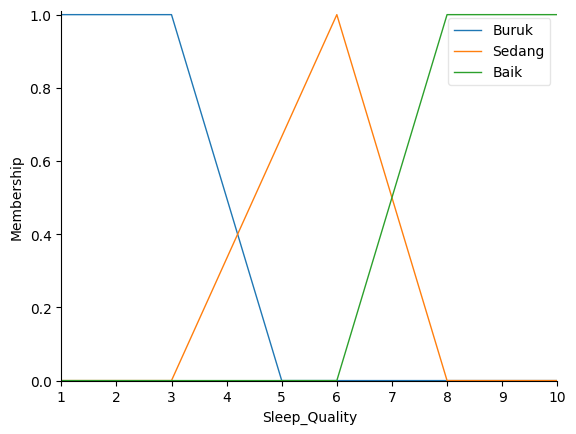

In [49]:
sleep_quality.view()
plt.show()

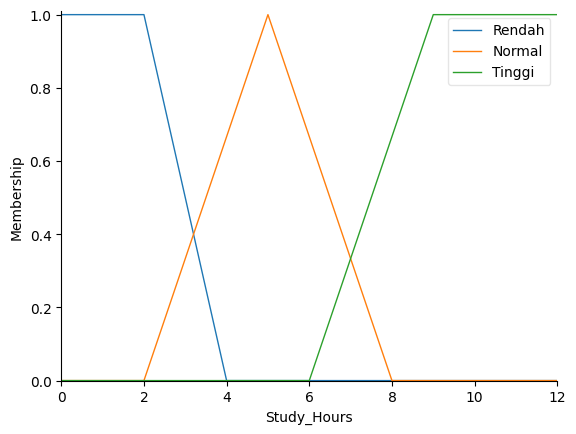

In [50]:
study_hours.view()
plt.show()

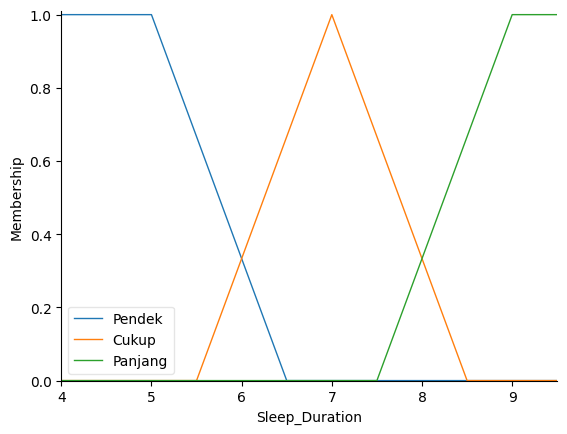

In [51]:
sleep_duration.view()
plt.show()

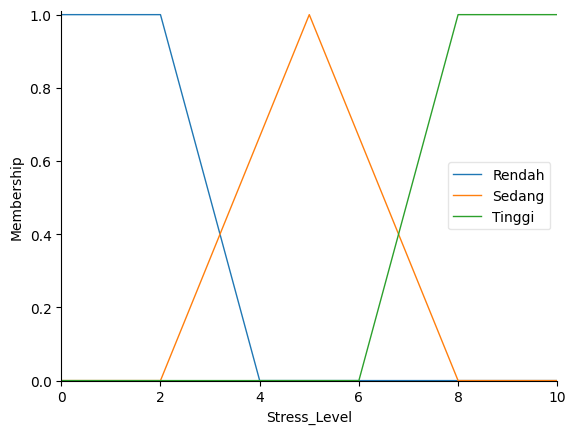

In [52]:
stress_level.view()
plt.show()

In [53]:
stress_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
stress_simulation = ctrl.ControlSystemSimulation(stress_ctrl)

In [54]:
print("Menerapkan model pada dataset...")
stress_scores = []
# Loop untuk setiap baris data mahasiswa
for index, row in df.iterrows():
    try:
        # Mencoba mengisi nilai input dan menjalankan komputasi
        stress_simulation.input['Sleep_Quality'] = row['Sleep_Quality']
        stress_simulation.input['Study_Hours'] = row['Study_Hours']
        stress_simulation.input['Sleep_Duration'] = row['Sleep_Duration']

        stress_simulation.compute()

        # Jika berhasil, tambahkan skor ke daftar
        stress_scores.append(stress_simulation.output['Stress_Level'])

    except KeyError:
        # Jika terjadi KeyError (tidak ada aturan yang aktif), tambahkan nilai NaN
        stress_scores.append(np.nan) # np.nan adalah singkatan dari Not a Number
        print(f"Peringatan: Tidak ada aturan yang cocok untuk data mahasiswa di baris index: {index}")

# Menambahkan hasil ke DataFrame
df['Stress_Score'] = stress_scores

# Mengkategorikan hasil skor menjadi Rendah, Sedang, Tinggi
def categorize_stress(score):
    # Cek dulu apakah skornya valid sebelum mengkategorikan
    if pd.isna(score):
        return 'Tidak Terdefinisi'
    elif score <= 4:
        return 'Rendah'
    elif score <= 7:
        return 'Sedang'
    else:
        return 'Tinggi'

df['Stress_Category'] = df['Stress_Score'].apply(categorize_stress)
print("Perhitungan tingkat stres untuk semua mahasiswa selesai.")

Menerapkan model pada dataset...
Perhitungan tingkat stres untuk semua mahasiswa selesai.


In [55]:
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Stress_Score,Stress_Category
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,4.575275,Sedang
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,7.788806,Tinggi
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,6.653541,Sedang
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,5.379404,Sedang
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,6.705882,Sedang


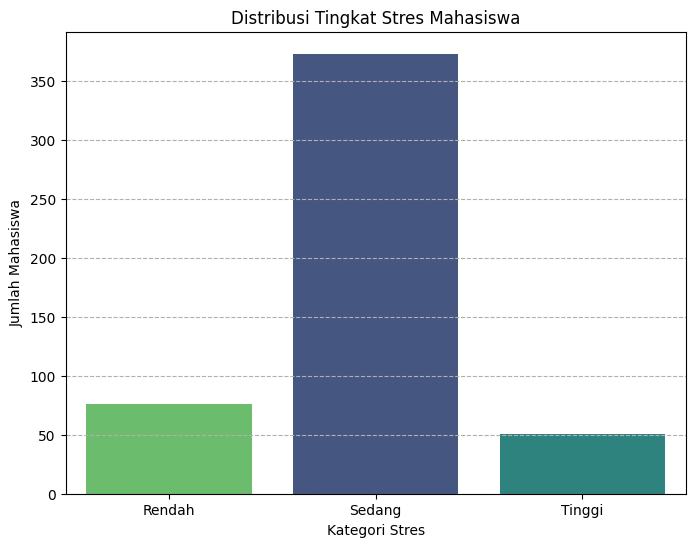

In [56]:
# Kode plot yang disempurnakan
plt.figure(figsize=(8, 6))
sns.countplot(
    x='Stress_Category',
    data=df,
    order=['Rendah', 'Sedang', 'Tinggi'],
    palette='viridis',
    hue='Stress_Category', # Tambahan untuk sintaks modern
    legend=False          # Tambahan untuk menyembunyikan legenda yang tidak perlu
)
plt.title('Distribusi Tingkat Stres Mahasiswa')
plt.xlabel('Kategori Stres')
plt.ylabel('Jumlah Mahasiswa')
plt.grid(axis='y', linestyle='--')
plt.savefig('distribusi_stres.png')
plt.show()

In [57]:
# Kelompokkan berdasarkan kategori stres dan hitung rata-rata variabel inputnya
stress_profile = df.groupby('Stress_Category')[['Sleep_Quality', 'Study_Hours', 'Sleep_Duration']].mean().round(2)
print("\nProfil Rata-rata per Kategori Stres:")
print(stress_profile)


Profil Rata-rata per Kategori Stres:
                 Sleep_Quality  Study_Hours  Sleep_Duration
Stress_Category                                            
Rendah                    8.45         4.19            7.72
Sedang                    5.21         6.60            6.11
Tinggi                    1.84         4.15            7.28



Hubungan Tingkat Stres dengan Tahun Kuliah:
Stress_Category  Rendah  Sedang  Tinggi
University_Year                        
1st Year             23      88      14
2nd Year             18      99      14
3rd Year             21     100      11
4th Year             14      86      12


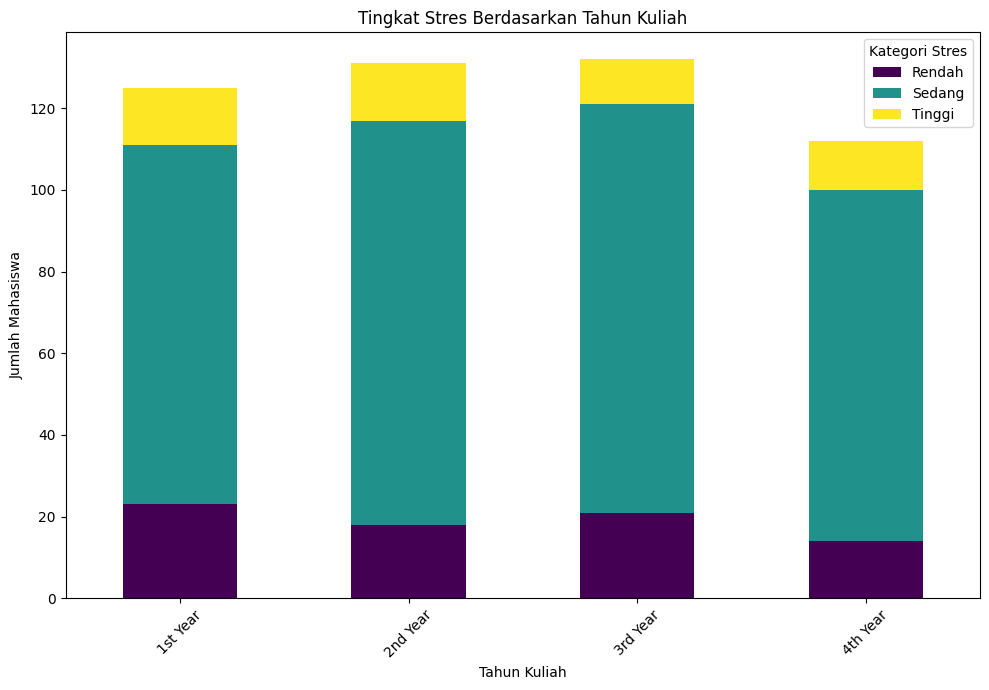

In [58]:
# Membuat tabel kontingensi antara Tahun Kuliah dan Kategori Stres
stress_vs_year = pd.crosstab(df['University_Year'], df['Stress_Category'])
print("\nHubungan Tingkat Stres dengan Tahun Kuliah:")
print(stress_vs_year)

# Visualisasi dengan stacked bar chart
stress_vs_year.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Tingkat Stres Berdasarkan Tahun Kuliah')
plt.xlabel('Tahun Kuliah')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45)
plt.legend(title='Kategori Stres')
plt.tight_layout()
plt.savefig('stres_vs_tahun_kuliah.png')
plt.show()

In [39]:
pip freeze requirements.txt

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.9.29.0.35.48
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
Authlib==1.6.4
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.21.0
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.23.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.9.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.3
chex==0.1.90
clar

In [41]:
pip freeze > requirements.txt